In [1]:
import os
import angr



proj = angr.Project('/home/nahid/reverse/binaries/elf-Linux-ARM64-bash')





WARNING  | 2023-02-07 13:44:24,726 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: UP
WARNING  | 2023-02-07 13:44:24,728 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: PC
WARNING  | 2023-02-07 13:44:24,728 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: BC
WARNING  | 2023-02-07 13:44:24,740 | cle.loader     | For more information about "Symbol was allocated without a known size", see https://docs.angr.io/extending-angr/environment#simdata


In [2]:
import monkeyhex # this will format numerical results in hexadecimal

print(proj.arch)

print(proj.entry)

print(proj.filename)


<Arch AARCH64 (LE)>
4319080
/home/nahid/reverse/binaries/elf-Linux-ARM64-bash


In [3]:
print(proj.loader,'\n\n')

print("Shared Objects:")
for so in (proj.loader.shared_objects):
    print(so)
print()
    
    
    
print('min_addr',proj.loader.min_addr)

print('max_addr',proj.loader.max_addr)


print('main_object',proj.loader.main_object)  # we've loaded several binaries into this project. Here's the main one!


print('does this binary have an executable stack?: ',proj.loader.main_object.execstack)  # sample query: does this binary have an executable stack?

print('is this binary position-independent?',proj.loader.main_object.pic)  # sample query: is this binary position-independent?



<Loaded elf-Linux-ARM64-bash, maps [0x400000:0x807fff]> 


Shared Objects:
elf-Linux-ARM64-bash
extern-address space
cle##tls

min_addr 4194304
max_addr 8421375
main_object <ELF Object elf-Linux-ARM64-bash, maps [0x400000:0x4e4197]>
does this binary have an executable stack?:  False
is this binary position-independent? False


PLT stub 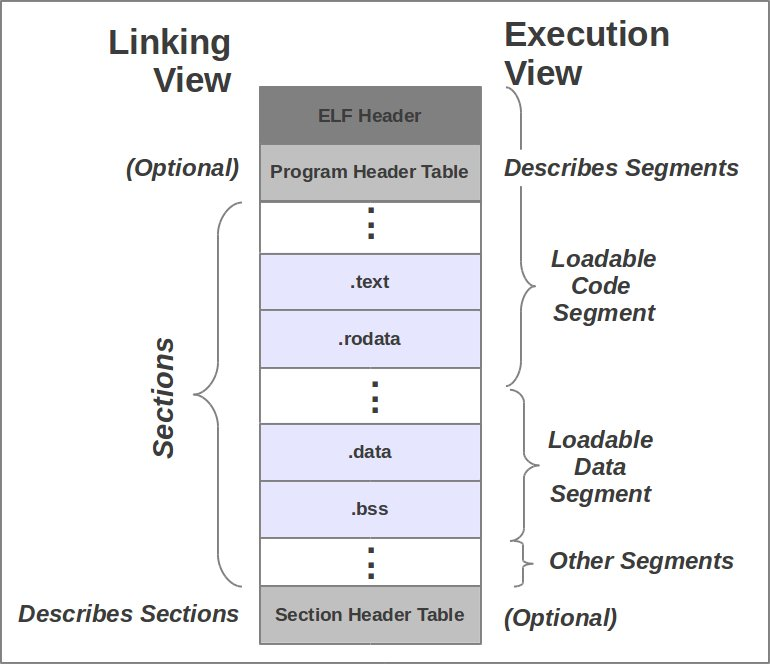

In [2]:
obj = proj.loader.main_object


print('# The entry point of the object',obj.entry)




print("Retrieve this ELF's segments and sections")

for segment in obj.segments:
    print('segment regions : ',segment)
print('\n\n')



for section in obj.sections:
    print("Section Regions: ",section)

            
# # You can get an ielf-Linux-ARM64-bashndividual segment or section by an address it contains:
print(" You can get an individual segment  by an address it contains:")
print('find_segment_containing(obj.entry)',obj.find_segment_containing(obj.entry))



print('\n')
print(" You can get an individual section by an address it contains:")

print("obj.find_section_containing(obj.entry)",obj.find_section_containing(obj.entry))



# # Get the address of the PLT stub for a symbol
# >>> addr = obj.plt['strcmp']
# >>> addr
# 0x400550
# >>> obj.reverse_plt[addr]
# 'strcmp'

# # Show the prelinked base of the object and the location it was actually mapped into memory by CLE
# >>> obj.linked_base
# 0x400000
# >>> obj.mapped_base
# 0x400000

# The entry point of the object 4319080
Retrieve this ELF's segments and sections
segment regions :  <ELFSegment flags=0x5, relro=0x0, vaddr=0x400000, memsize=0xc54ec, filesize=0xc54ec, offset=0x0>
segment regions :  <ELFSegment flags=0x4, relro=0x1, vaddr=0x4d5dd0, memsize=0x230, filesize=0x230, offset=0xc5dd0>
segment regions :  <ELFSegment flags=0x6, relro=0x0, vaddr=0x4d6000, memsize=0xe198, filesize=0x8668, offset=0xc6000>



Section Regions:  <Unnamed | offset 0x0, vaddr 0x0, size 0x0>
Section Regions:  <.interp | offset 0x1c8, vaddr 0x4001c8, size 0x1b>
Section Regions:  <.note.ABI-tag | offset 0x1e4, vaddr 0x4001e4, size 0x20>
Section Regions:  <.note.gnu.build-id | offset 0x204, vaddr 0x400204, size 0x24>
Section Regions:  <.gnu.hash | offset 0x228, vaddr 0x400228, size 0x4a28>
Section Regions:  <.dynsym | offset 0x4c50, vaddr 0x404c50, size 0xcc90>
Section Regions:  <.dynstr | offset 0x118e0, vaddr 0x4118e0, size 0x8405>
Section Regions:  <.gnu.version | offset 0x19ce6, vaddr

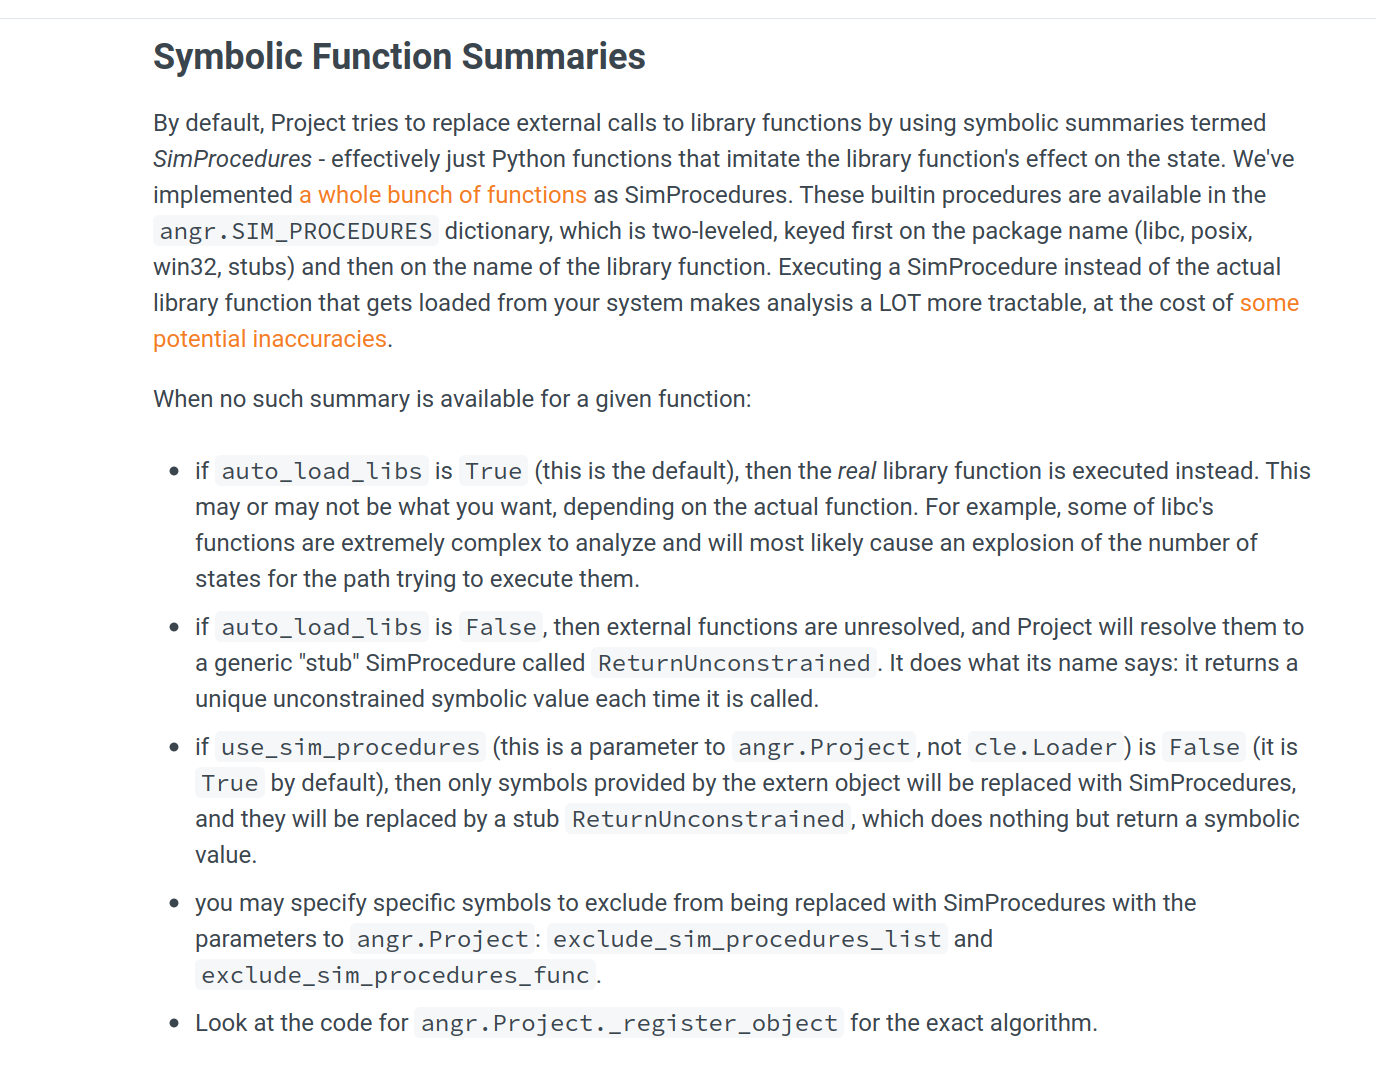